provide answer in sage markdown window  with sage 9.3 simple code

$\textbf{1. Consider the matrix}$

$A=\begin{bmatrix} 1 & 2 & 1 & 2 \\ 2 & k & 0 & 1 \\ 0 & 1 & 0 & 1   \end{bmatrix}$

where k = 1+(4 mod 3). 

Using Sagemath:  
(a) Calculate numerically the SVD of A.  
(b) Calculate the rank-1 approximation of A  
(c) Derive the matrix $AA^T$ in the symbolic ring and find its exact eigenvectors and eigenvalues


In [140]:
# Define the matrix A
A = matrix(QQ,[[1, 2, 1, 2], [2, 2, 0, 1], [0, 1, 0, 1]])
show(A)

A_real = A.change_ring(RDF)

# Compute the SVD of A
U, S, V = A_real.SVD()

# Display the results
print("U=", n(U,digits=3))

print("S=",n(S,digits=3))

print("V=",n(V,digits=3))


[1 2 1 2]
[2 2 0 1]
[0 1 0 1]

TypeError: 'sage.rings.integer.Integer' object is not callable

In [ ]:
#b
u1= U.column(0)
v1= V.column(0)

# Extract the largest singular value
s1=S[0,0]

# Rank-1 approximation of A
A1= s1*(u1.outer_product(v1))
print("A1=",n(A1,digits=3))

In [ ]:
#c
AA_T = A * A.transpose();
eigenvalues = AA_T.eigenvalues();
eigenvalues

$\textbf{2. Consider the function}$  
f(x, y) = 100 ∗ (y − x2)2 + (2 − x − y)2 ,


where (x, y) ∈ R2. Using Sagemath and working analytically


(a) find the stationary points;  
(b) calculate the function value at each stationary point;   
(c) classify the stationary points according to their type (minima, maxima, saddle points);  
(d) plot the function using a contour plot with appropriate bounds and depict the stationary points on
this plot (in different colours depending on their type)

In [ ]:
# Define the variables
x, y = var('x y')

# Define the function
f(x, y) = 100 * (y - x^2)^2 + (2 - x - y)^2

# Compute the gradient
grad_f = f.gradient()

# Solve for stationary points
stationary_points =  solve([eq == 0 for eq in grad_f], x, y)
stationary_points


In [ ]:
f(x,y).subs(stationary_points[0]),f(x,y).subs(stationary_points[1]),f(x,y).subs(stationary_points[2])

In [ ]:
H = f.hessian(); H(x,y)

sH=[H(x,y).substitute(s).eigenvalues() for s in stationary_points];

p1=list(map(n,sH[0]))
p2=list(map(n,sH[1]))
p3=list(map(n,sH[2]))

p1,p2,p3

# p1, p2 = min (all positive)
# p3 = saddle point


$\textbf{3. Consider the following two sets of vectors}$  

(i) $b1 = (1, 2, 2)^T$ , $b2 = (−1, 2, 1)^T$ , $b3 = (0, 8, 0)^T$  
(ii) $b1 = (1, 2, 2)^T$ , $b2 = (−1, 2, 1)^T$ , $b3 = (0, 8, 6)^T$  

Using Sagemath  
(a) find which of these sets is/are basis/es in R3. Comment on the result.  
(b) construct the corresponding orthonormal basis e1, e2, e3;  
(c) verify that the vectors e1, e2, e3 are indeed orthonormal  
(d) write the vector ⃗k = (1, 2, 3) in the basis e1, e2, e3;  

In [ ]:
# Define the vectors
b1_1 = vector([1, 2, 2])
b2_1 = vector([-1, 2, 1])
b3_1 = vector([0, 8, 0])

b1_2 = vector([1, 2, 2])
b2_2 = vector([-1, 2, 1])
b3_2 = vector([0, 8, 6])

# Construct the matrices with these vectors as columns
M1 = matrix([b1_1, b2_1, b3_1]).transpose()
M2 = matrix([b1_2, b2_2, b3_2]).transpose()


det(M1), det(M2)
#if 0 the value then linearly dependent NO BASIS of R3

In [ ]:
# Apply Gram-Schmidt process to obtain an orthonormal basis
orth_basis, norms = M1.gram_schmidt()

# Extract the orthonormal basis vectors
orth_basis1 = orth_basis.column(0)
orth_basis2 = orth_basis.column(1)
orth_basis3 = orth_basis.column(2)

orthonormal_basis1 = orth_basis1 / norm(orth_basis1)
orthonormal_basis2 = orth_basis2 / norm(orth_basis2)
orthonormal_basis3 = orth_basis3 / norm(orth_basis3)

(orthonormal_basis1, orthonormal_basis2, orthonormal_basis3)


In [ ]:
# Check norms
norm_e1 = e1.norm()
norm_e2 = e2.norm()
norm_e3 = e3.norm()

# Check orthogonality
orthogonal_e1_e2 = e1.dot_product(e2)
orthogonal_e1_e3 = e1.dot_product(e3)
orthogonal_e2_e3 = e2.dot_product(e3)

# Display results
(norm_e1, norm_e2, norm_e3, orthogonal_e1_e2, orthogonal_e1_e3, orthogonal_e2_e3)

In [ ]:
# Define the original vector k
k = vector([1, 2, 3])

# Project k onto each of the orthonormal basis vectors
a = k.dot_product(e1)
b = k.dot_product(e2)
c = k.dot_product(e3)

# Display the coefficients
(a, b, c)



$\textbf{4. Given the system}$  
2y + λz + ω = 1  
2x + 2y + 3ω = −1  
x + 2y + ω = 0  
3x + 5z + ω = 2  

where λ is a parameter. 

Use Sagemath to  
(a) find the value/es of λ for which the system has no solutions;  
(b) for values of λ different than those of question (a) find and simplify (as far as possible) the solution of
the system in terms of λ

In [ ]:
λ = var('λ')
x1,x2,x3,x4= var('x1,x2,x3,x4')

# Set up the augmented matrix
A = Matrix([[0, 2, λ, 1], [2, 2, 0, 3], [1, 2, 0, 1], [3, 0, 5, 1]])
X = vector([x1,x2,x3,x4])
Y = vector([1,-1,0,2])

# Solve the system for lambda
solutions = solve(det(A) == 0, λ)
# Print the solutions
solutions

In [ ]:
X = (A^(-1)*Y).simplify_full()
X

In [ ]:
#Solutions for λ=2
S = (A^(-1)*Y).substitute(λ=2)
S


$\textbf{5. Find the projection}$  

$P_b$ of the vector $b= \begin{bmatrix} 1 \\ 2 \\ 3\end{bmatrix}$ onto the subspace of $R^3$ spanned by the vectors 

$b1= \begin{bmatrix} 1 \\ 0 \\ 1\end{bmatrix}$ and 
$b2= \begin{bmatrix} 1 \\ 1 \\ 0\end{bmatrix}$

(b) Compute the projection error eb  
(c) find the associated projection matrix for any x ∈ R^3.

In [ ]:
# Define the vectors
b = vector([1, 2, 3])
b1 = vector([1, 0, 1])
b2 = vector([1, 1, 0])

# Create the matrix A whose columns are the basis vectors of the subspace
A = matrix([b1, b2]).transpose()

# Compute the projection matrix P
P = A * (A.transpose() * A).inverse() * A.transpose()

# Compute the projection Pb of b onto the subspace
Pb = P * b

Pb


In [ ]:
eb = b - Pb

eb

In [ ]:
# Create the matrix A whose columns are the basis vectors of the subspace
A = matrix([b1, b2]).transpose()

# Compute A^T A
ATA = A.transpose() * A

# Compute the inverse of A^T A
ATA_inv = ATA.inverse()

# Compute the projection matrix P
P = A * ATA_inv * A.transpose()

P

$\textbf{6. Assume the system of equations in x, y, z, t}$  
$ax + y + z + t = 1$  
$x + ay + z + t = b$  
$x + y + az + t = b^2$  
$x + y + z + at = b^3$  
where a, b are integer parameters.  

Using sagemath  
(a) find a formal solution of the system in terms of a, b  
(b) determine the values of a, b for which the system has infinitely many solutions and the values of a, b for which the system is impossible;  
(c) derive the full solution for a = the first digit of your academic ID, b = the last digit of your academic ID.  

In [ ]:
# Define variables
var('x y z t')

# Define parameters
var('a b')

# Define the system of equations
eq1 = a*x + y + z + t == 1
eq2 = x + a*y + z + t == b
eq3 = x + y + a*z + t == b^2
eq4 = x + y + z + a*t == b^3

# Solve the system of equations
solution = solve([eq1, eq2, eq3, eq4], x, y, z, t)
solution


In [ ]:
# Define the coefficient matrix
A = matrix(SR, [
    [a, 1, 1, 1],
    [1, a, 1, 1],
    [1, 1, a, 1],
    [1, 1, 1, a]
])

# Define the augmented matrix
b_vector = vector(SR, [1, b, b^2, b^3])
augmented_matrix = A.augment(b_vector, subdivide=True)

# Calculate the determinant of the coefficient matrix
det_A = A.det()

# Calculate the rank of the coefficient matrix and the augmented matrix
rank_A = A.rank()
rank_augmented = augmented_matrix.rank()

print('det_A = ',det_A)
print('rank_A = ',rank_A)
print('rank_augmented = ',rank_augmented)

#1. Infinitely Many Solutions: 
# The system will have infinitely many solutions if det(A) = 0 and rank(A) = rank([A | b).

#2. **No Solutions:** 
# The system will be inconsistent (impossible) if rank(A) < rank(A |b).
solve(det_A==0,a)

In [ ]:
# Substitute a = 9 and b = 2 into the equations
eq1_sub = eq1.subs({a: 9, b: 2})
eq2_sub = eq2.subs({a: 9, b: 2})
eq3_sub = eq3.subs({a: 9, b: 2})
eq4_sub = eq4.subs({a: 9, b: 2})

# Solve the system of equations with the substituted values
solution = solve([eq1_sub, eq2_sub, eq3_sub, eq4_sub], x, y, z, t)
solution

$\textbf{7. Consider the Euclidean vector space}$  
R5 with the Euclidean inner product. A subspace $U ⊂ R^5$ is defined by 

$
\mathbf{U} = span \left\{
\begin{bmatrix} 0 \\ -1 \\ 2 \\ 0 \\ 2 \end{bmatrix},
\begin{bmatrix} 1 \\ -3 \\ 1 \\ -1 \\ 2 \end{bmatrix},
\begin{bmatrix} -3 \\ 4 \\ 1 \\ 2 \\ 1 \end{bmatrix},
\begin{bmatrix} -1 \\ -3 \\ 5 \\ 0 \\ 7 \end{bmatrix}
\right\}
$

Using Sagemath
(a) check if the vectors that span 𝑈 are linearly independent;
(b) find the projection matrix that maps R5 onto 𝑈;
(c) find the projection of the vector $x= \begin{bmatrix} -1 \\ 9 \\-1 \\ 4 \\1\end{bmatrix}$ onto 𝑈;
(d) compute the projection error in question (c) both analytically and numerically.  

In [141]:
# Define the vectors
v1 = vector([0, -1, 2, 0, 2])
v2 = vector([1, -3, 1, -1, 2])
v3 = vector([-3, 4, 1, 2, 1])
v4 = vector([-1, -3, 5, 0, 7])

# Create a matrix with these vectors as columns
M = matrix([v1, v2, v3, v4]).transpose()

# Check the rank of the matrix
rank = M.rank()
rank

# Check if the vectors are linearly independent
is_independent = (rank == M.ncols())
is_independent

M, rank, is_independent


(
[ 0  1 -3 -1]          
[-1 -3  4 -3]          
[ 2  1  1  5]          
[ 0 -1  2  0]          
[ 2  2  1  7], 3, False
)

In [142]:
# The four vectors are linearly dependent. 
# We can pick three of them as a basis, provided they are linearly independent

# Create a matrix A with these vectors as columns
A = matrix([v1, v2, v3]).transpose()

# Calculate the projection matrix P = A (A^T A)^(-1) A^T
P = A * (A.transpose() * A).inverse() * A.transpose()
P


[10/21  -2/7  4/21  -1/7  -1/3]
[ -2/7 43/63  4/63   2/7  -2/9]
[ 4/21  4/63 58/63   1/7   1/9]
[ -1/7   2/7   1/7   1/7     0]
[ -1/3  -2/9   1/9     0   7/9]

In [143]:
# Define the vector x
x = vector([-1, 9, -1, 4, 1])

# Calculate the projection of x onto U
projection = P * x
projection

(-29/7, 51/7, 1/7, 22/7, -1)

In [144]:
# Calculate the projection error e = x - p
e = x - projection

# Compute the Euclidean norm of the error vector
error_norm = e.norm()
error_norm

2*sqrt(33/7)

$\textbf{8. Consider the matrix}$  
$A= \begin{pmatrix} −2 & 6 & −3 \\ 6 & 3 & 2 \\ −3 & 2 & a \end{pmatrix}$  

where a is a real parameter and $x = (1, 1, 1)^T$

Consider the case a = −18. Using Sagemath  
(a) compute the eigenvalues and the eigenvectors of A;  
(b) normalize the eigenvectors of A;  
(c) compute (numerically with 3 significant digits) the components of x in the orthonormal basis of question (b)  
(e) what is the algebraic multiplicity of each eigenvalue?  
(f) are the eigenvectors orthogonal ? If not find an orthonormal basis.

In [145]:
a = 6
A = matrix(QQ, [[-2, 6, -3], [6, 3, 2], [-3, 2, a]])

# Define the vector x
x = vector([1, 1, 1])

# Extract eigenvalues and eigenvectors
eigenvalues = A.eigenvalues()
eigenvectors = A.eigenvectors_right()

print('eigenvalues: ' ,eigenvalues) 
print('eigenvectors: ' ,eigenvectors)

#The algebraic multiplicities of the eigenvalues are
eigenvectors[0][2], eigenvectors[1][2]

eigenvalues:  [-7, 7, 7]
eigenvectors:  [(-7, [
(1, -2/3, 1/3)
], 1), (7, [
(1, 0, -3),
(0, 1, 2)
], 2)]


(1, 2)

In [146]:
# Normalize the eigenvectors
normalized_eigenvectors = [v[1][0].normalized() for v in eigenvectors]

normalized_eigenvectors

[(3/14*sqrt(14), -1/7*sqrt(14), 1/14*sqrt(14)),
 (1/10*sqrt(10), 0, -3/10*sqrt(10))]

In [147]:

# Form the change of basis matrix P
P = matrix(normalized_eigenvectors).transpose()

# Compute the components of x in the new basis
components_in_new_basis = P.solve_right(x)

# Display components with 3 significant digits
components_in_new_basis.n(digits=3)

(-1.87, 7.91)

In [148]:
#Get the eigenvectors 
u1,u2,u3=eigenvectors[0][1][0],eigenvectors[1][1][0],eigenvectors[1][1][1]
u1,u2,u3

#If any entry is non-zero, then the eigenvectors are not orthogonal
#If the eigenvectors are not orthogonal, we can find an orthonormal basis using the Gram-Schmidt process. Here’s how you can do it in SageMath:

u1.dot_product(u2),u1.dot_product(u3),u2.dot_product(u3)

(0, 0, -6)

In [149]:
#Gram-Schmidt process
nb=matrix(QQ,[u1,u2,u3]);
orthogonal_basis, norms = nb.gram_schmidt()
orthogonal_basis, norms 

# Normalize the orthogonalized vectors to get an orthonormal basis
orthonormal_basis1= orthogonal_basis[0].normalized(),
orthonormal_basis2= orthogonal_basis[1].normalized(),
orthonormal_basis3= orthogonal_basis[2].normalized();

orthonormal_basis1,orthonormal_basis2,orthonormal_basis3

(((3/14*sqrt(14), -1/7*sqrt(14), 1/14*sqrt(14)),),
 ((1/10*sqrt(10), 0, -3/10*sqrt(10)),),
 (3/7*sqrt(7/5), 5/7*sqrt(7/5), 1/7*sqrt(7/5)))

$\textbf{9. Consider the function}$ 
$𝑓(𝑥) = ln (1 + 𝑒^𝑥)$ utilised in machine learning. 

Using sagemath

(i) Compute the Taylor approximation of 𝑓(𝑥) around 𝑥 = 0 including terms up to 10-th order in 𝑥 (use series function).  
(ii) Plot the softplus function as well as the Taylor approximation of question (i) in a combined
plot in the region −5 < 𝑥 < 5, −1 < 𝑦 < 4 (use different colors and styles for the two curves)
and comment on the region of validity of the approximation.  
(iii) Compute the derivative of 𝑓(𝑥) analytically  
(iv) Compute the derivative of 𝑓(𝑥) approximately using the result of (i).  
(v) Plot the results of (iii) and (iv) in a combined plot in the region −5 < 𝑥 < 5, −1 < 𝑦 < 1
(use different colors and styles for the two curves).

In [150]:
# Define the variable and the function
var('x')
f = log(1 + exp(x))

# Compute the Taylor series approximation of f(x) around x = 0 up to the 10th order
taylor_approximation = f.taylor(x, 0, 10)

taylor_approximation


31/14515200*x^10 - 17/645120*x^8 + 1/2880*x^6 - 1/192*x^4 + 1/8*x^2 + 1/2*x + log(2)

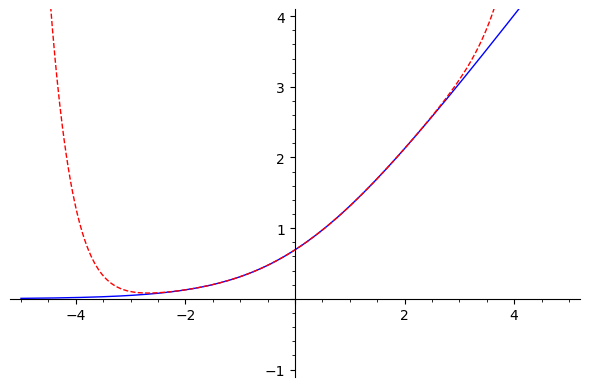

In [151]:
# Plot the softplus function
softplus_plot = plot(f, (x, -5, 5),  color='blue')

# Plot the Taylor approximation
taylor_plot = plot(taylor_approximation, (x, -5, 5), ymin=-1, ymax=4, color='red', linestyle='--')

# Combine the plots
combined_plot = softplus_plot + taylor_plot

# Show the combined plot with a legend
combined_plot

In [152]:
# Compute the derivative of the function
f_prime = diff(f, x)

f_prime

e^x/(e^x + 1)

In [153]:
# Differentiate the Taylor series approximation term-by-term
taylor_approximation_derivative = taylor_approximation.diff(x)
taylor_approximation_derivative

31/1451520*x^9 - 17/80640*x^7 + 1/480*x^5 - 1/48*x^3 + 1/4*x + 1/2